<a href="https://colab.research.google.com/github/SuhwanChung/CE7454/blob/chunhung/CE7454_project_Demand_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import urllib.request
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')



from google.colab import drive
drive.mount('/content/drive')
wd = 'drive/MyDrive/Colab Notebooks/'

with open(wd+'lunar_key') as f:
  key = f.read().split('\n')[0]


url = f"https://api.lunarcrush.com/v2?data=assets&key={key}&symbol=BTC&interval=day&data_points={365*2}"
response = urllib.request.urlopen(url)
data = json.load(response) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
print(data['usage'])
print(data['config'])

{'day': 1, 'month': 22}
{'data': 'assets', 'data_points': 720, 'interval': 'day', 'symbol': "'BTC'"}


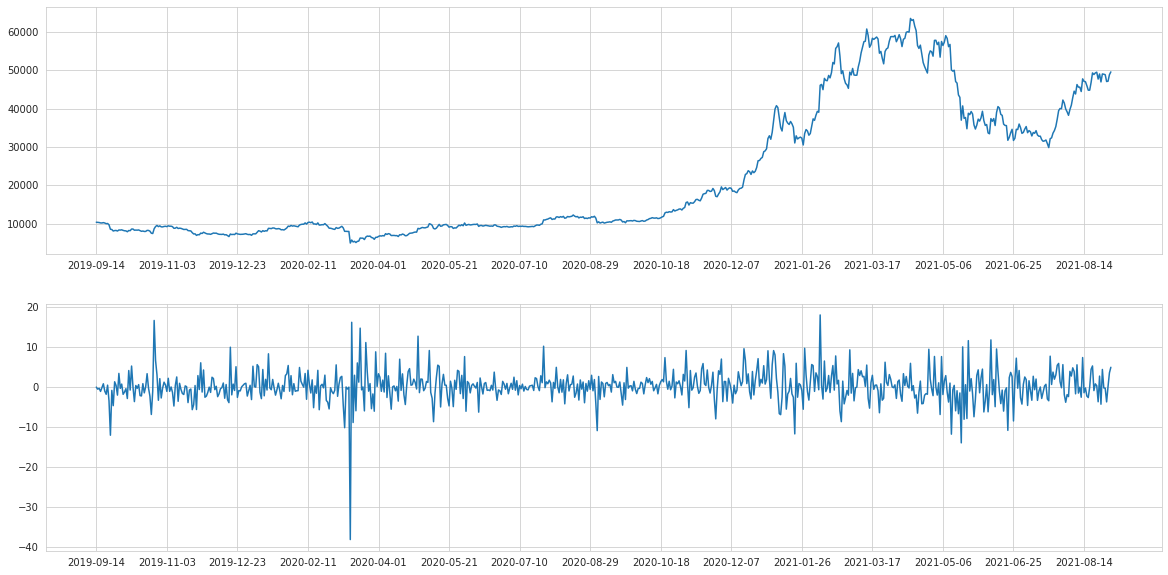

In [8]:
btc = pd.DataFrame(data['data'][0]['timeSeries'])

btc['datetime'] = btc['time'].apply(lambda ts: datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'))
btc = btc.set_index('datetime')

_, ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(btc['close'])
ax[0].set_xticks(range(0,btc.shape[0],50))
ax[1].plot(btc['percent_change_24h'])
ax[1].set_xticks(range(0,btc.shape[0],50))